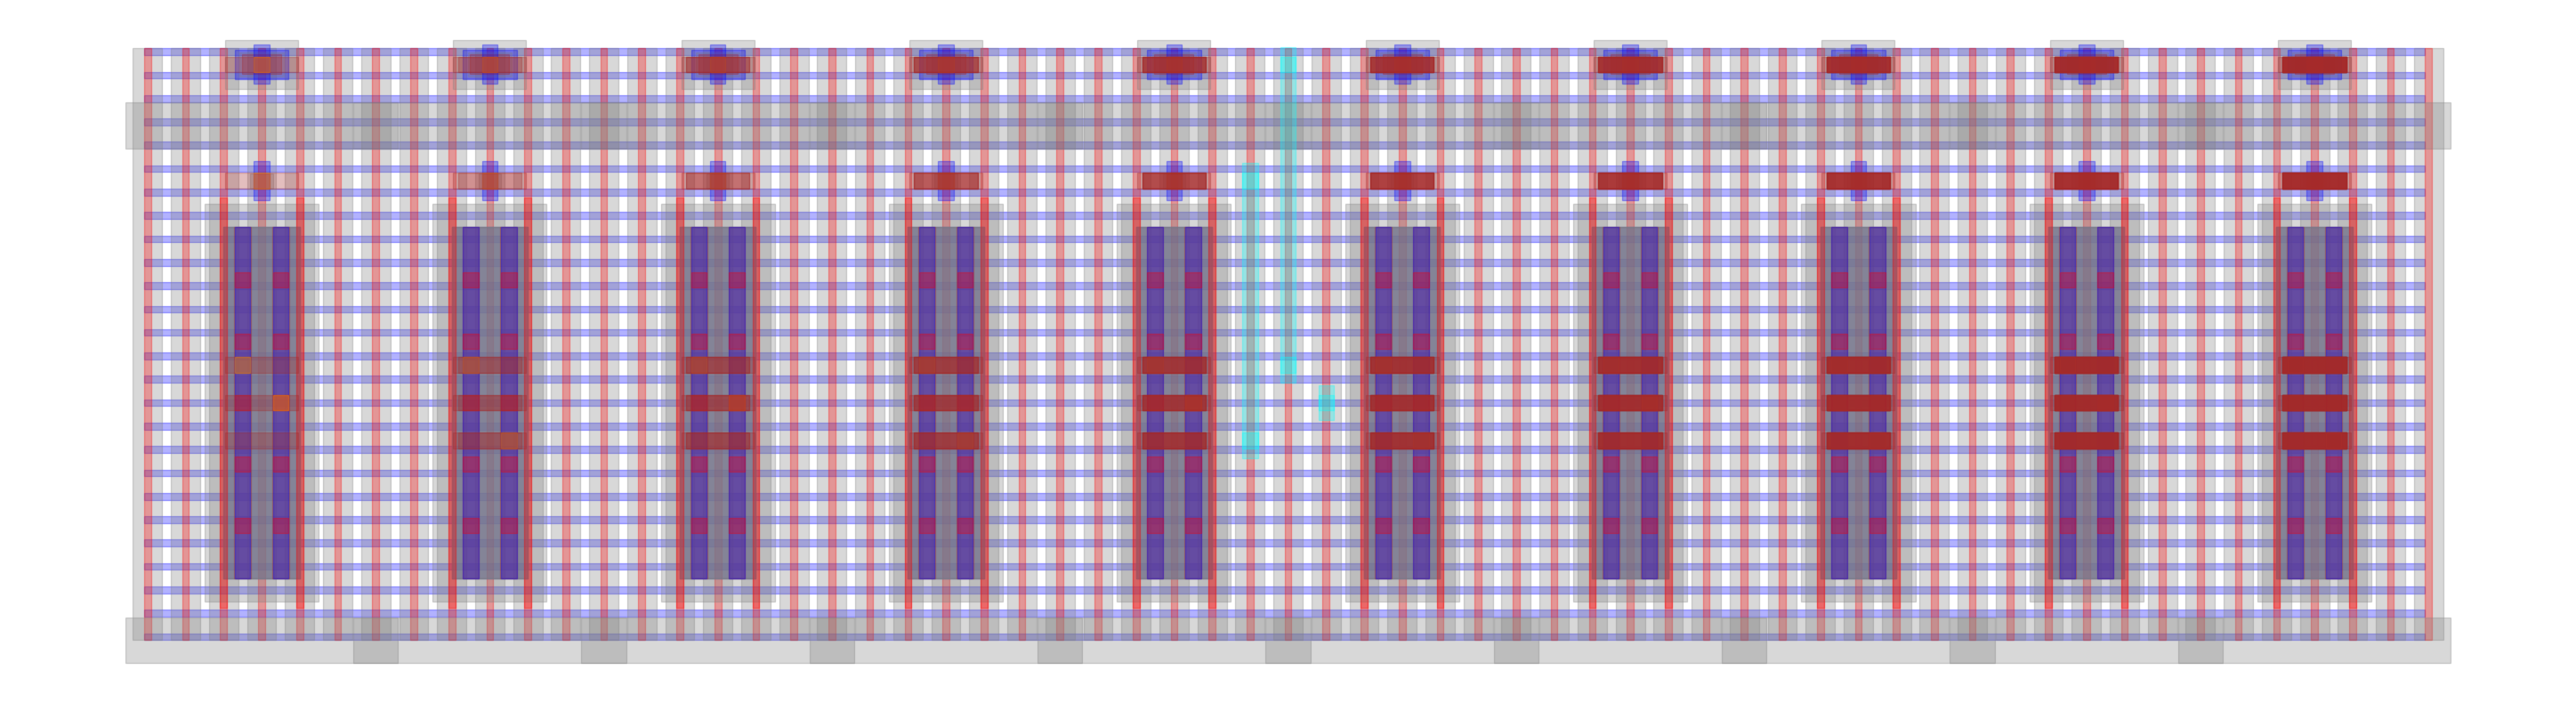

In [12]:
from layout_gen.utilities.elements_utils import write_gds
import numpy as np
from pex.ext_util import *
from visualizer.plot_funcs import *
# a = gdstk.read_gds("outputs/nmos_cm_.gds")
# a = gdstk.read_gds("outputs/other/nmos_cm_x.gds")
# a = gdstk.read_gds("outputs/nmos_cm_2x9_0.gds")
# a = gdstk.read_gds("outputs/nmos_dp_6x5_2.gds")
# a = gdstk.read_gds("outputs/five_transistor_ota.gds")
# a = gdstk.read_gds("outputs/nmos_cm_3x25x1_111_3.gds")
a = gdstk.read_gds("outputs/nmos_cm_15x5x1_111_3.gds")

# a = gdstk.read_gds("outputs/nmos_cm_x.gds")

a1 = a.cells[0]
# a1 = merge_metal_polygons(a1, target_layer=17, datatype=0)

fig, ax = plt.subplots(figsize=(40, 10))
show_gds(ax, a1)
plt.show()

# write_gds(a1, "merged_trial.gds")

In [9]:

polygons = get_polygons(a1)
nets = get_nets(polygons)    

# for n in nets:
#     print(n.id)
# 
# # print(len(nets[2].diffs))
# 
# for i, p in enumerate(polygons["diffusions"]):
#     print(i, p.id)

m_2 = polygons["metal_2"]

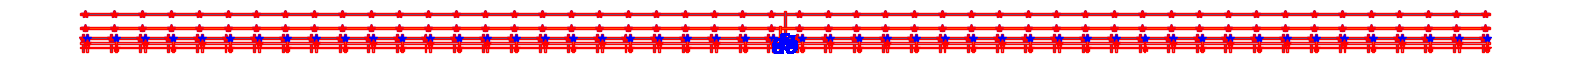

In [10]:
fig, ax = plt.subplots(figsize=(20,10))
show_nets(ax, nets, "True")
plt.show()

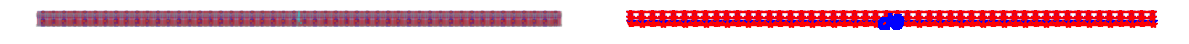

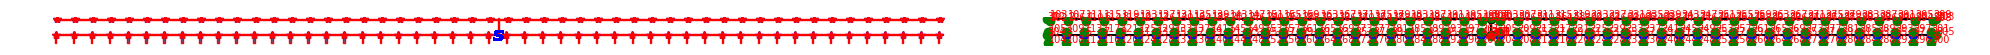

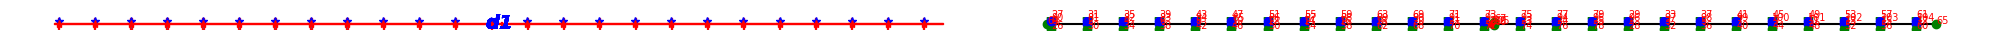

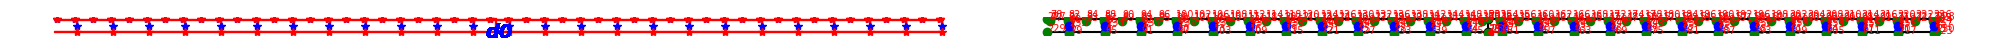

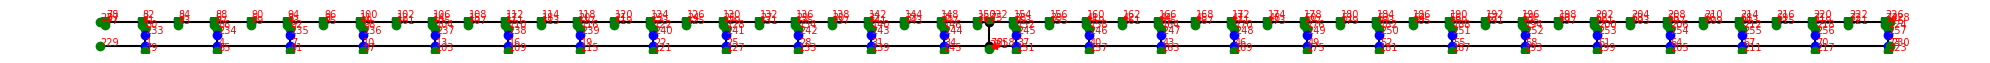

In [11]:
from pex.extract import *

fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # Create a figure with 2 subplots
show_gds(axes[0], a1)
show_nets(axes[1], nets, True)
plt.tight_layout()
plt.show()
plt.close()

for target_net in nets:
    js, _ = convert_net_to_stick(target_net, th1=50, th2=20) 
    nodes = find_all_nodes(js, target_net, node_reduction=True)

    fig, axes = plt.subplots(1, 2, figsize=(20, 10))  # Create a figure with 2 subplots
    show_nets(axes[0], [target_net], True)
    show_stk_nets(axes[1], js, nodes)
    plt.tight_layout()
    plt.show()
    plt.close()

target_net = nets[2]
js, _ = convert_net_to_stick(target_net, th1=50, th2=20) 
nodes = find_all_nodes(js, target_net, node_reduction=True)


fig, ax = plt.subplots(figsize = (20, 10))
show_stk_nets(ax, js, nodes)
plt.tight_layout()
plt.show()
plt.close()


In [76]:
graph = np.empty_like(nodes)
for i, nd in enumerate(nodes):
    adj = adjacent_nodes(nd, nodes, js)
    graph[i] = adj
def dfs_iterative(graph, start):
    visited = set()
    stack = [start]
    res = []
    while stack:
        vertex = stack.pop()
        if vertex not in visited:
            visited.add(vertex)
            neighbors = []
            for neighbor in graph[vertex]:
                if neighbor not in visited:
                    neighbors.append(neighbor)
            stack.extend(neighbors)
            res.append([vertex, neighbors])
    return res
label_index = 0
for i, nd in enumerate(nodes):
    if nd["t"] == "L":
        label_index = i
        break
nds = dfs_iterative(graph, label_index)

print(nds)

[[182, [30, 112]], [112, [145]], [145, [114]], [114, [16]], [16, [177, 64, 146]], [146, [116]], [116, [147]], [147, [118]], [118, [19]], [19, [178, 70, 148]], [148, [120]], [120, [149]], [149, [122]], [122, [22]], [22, [179, 76, 150]], [150, [124]], [124, [151]], [151, [126]], [126, [25]], [25, [180, 82, 152]], [152, [128]], [128, [132]], [132, [130]], [130, [28]], [28, [181, 88, 133]], [133, []], [88, []], [181, [89]], [89, []], [82, []], [180, [83]], [83, []], [76, []], [179, [77]], [77, []], [70, []], [178, [71]], [71, []], [64, []], [177, [65]], [65, []], [30, [31, 170, 144]], [144, [13]], [13, [176, 58, 110]], [110, [143]], [143, [108]], [108, [142]], [142, [10]], [10, [175, 52, 106]], [106, [141]], [141, [104]], [104, [140]], [140, [7]], [7, [174, 46, 102]], [102, [139]], [139, [100]], [100, [138]], [138, [4]], [4, [173, 40, 98]], [98, [137]], [137, [96]], [96, [136]], [136, [1]], [1, [172, 34, 93]], [93, [92]], [92, []], [34, []], [172, [35]], [35, []], [40, []], [173, [41]], [4

In [77]:
poly_counter = 0
diff_counter = 0

# giving ids for all polys and diffs
for n in nets:
    for poly in n.polys:
        poly.id = poly_counter

        for r in polygons["rvt"]:
            if are_they_connected(r, poly):
                poly.vt_box.append(r.id) 

        poly_counter += 1
    for diff in n.diffs:
        diff.id = diff_counter
        diff_counter += 1
   
# ------------------------------------------------
print("Polys")
for n in nets:
   for p in n.polys:
    print(p.id,f"{p.mid}  ", end=" ")

print("\nNets")
for n in nets:
   for d in n.diffs:
    print(d.id, end=" ")
# ------------------------------------------------

Polys
0 264.0   1 732.0   2 1200.0   3 1668.0   4 2136.0   5 2604.0   6 3072.0   7 3540.0   8 4008.0   9 4476.0   10 4944.0   11 5412.0   12 5880.0   13 6348.0   14 6816.0   15 7284.0   16 7752.0   17 8220.0   18 8688.0   19 9156.0   
Nets
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 

In [14]:
instances = {}  # np.empty([1,total_poly_no])
for n in nets:
    for poly in n.polys:
        vt_ind = poly.vt_box[0]
        vt_polygon = polygons["rvt"][vt_ind]
        r_point = [poly.mid + 78 / 2, vt_polygon.mid_point[1]]  # poly pitch/2
        l_point = [poly.mid - 78 / 2, vt_polygon.mid_point[1]]  # poly pitch/2
        # search for diffs
        instance_i = [-1, -1]
        for net in nets:
            for diff in net.diffs:
                # print(f"-- {l_point}, {diff.mid} --")
                if is_point_inside_the_polygon(l_point, diff):
                    instance_i[0] = diff.id
                if is_point_inside_the_polygon(r_point, diff):
                    instance_i[1] = diff.id
        
        instances[poly.id] = instance_i

# -------------------------------------------------
print(instances)
# -------------------------------------------------

{0: [-1, -1], 1: [-1, -1], 2: [-1, -1], 3: [-1, -1], 4: [-1, -1], 5: [-1, -1], 6: [-1, -1], 7: [-1, -1], 8: [-1, -1], 9: [-1, -1], 10: [-1, -1], 11: [-1, -1], 12: [-1, -1], 13: [-1, -1], 14: [-1, -1], 15: [-1, -1], 16: [-1, -1], 17: [-1, -1], 18: [-1, -1], 19: [-1, -1], 20: [-1, -1], 21: [-1, -1], 22: [-1, -1], 23: [-1, -1], 24: [-1, -1], 25: [-1, -1], 26: [-1, -1], 27: [-1, -1], 28: [-1, -1], 29: [-1, -1], 30: [-1, -1], 31: [-1, -1], 32: [-1, -1], 33: [-1, -1], 34: [-1, -1], 35: [-1, -1], 36: [-1, -1], 37: [-1, -1], 38: [-1, -1], 39: [-1, -1], 40: [-1, -1], 41: [-1, -1], 42: [-1, -1], 43: [-1, -1], 44: [-1, -1], 45: [-1, -1], 46: [-1, -1], 47: [-1, -1], 48: [-1, -1], 49: [-1, -1]}


In [15]:
# identifying instances with shared diffusion
class Diff:
    def __init__(self):
        self.net = -1
        self.instances = []
        self.type = ''
        self.side = ''
        
diff_array = {}  # diffs, associated_instances, net_name
for key in instances:
    inst = instances[key]
    l_diff = inst[0]
    r_diff = inst[1]
    l_diff_i = Diff()
    r_diff_i = Diff()
    if not l_diff in diff_array:
        l_diff_i.instances.append(key)
        l_diff_i.side = 'l'
        diff_array[l_diff] = l_diff_i
    else:
        diff_array[l_diff].side = 'b'
        diff_array[l_diff].instances.append(key)
    if not r_diff in diff_array:
        r_diff_i.instances.append(key)
        r_diff_i.side = 'r'
        diff_array[r_diff] = r_diff_i
    else:
        diff_array[r_diff].side = 'b'
        diff_array[r_diff].instances.append(key)
        
# ----------------------------------------------------------
for key, df in diff_array.items():
    print(key,"\t",df.instances,"\t", df.side)
# ----------------------------------------------------------

-1 	 [0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47, 48, 48, 49, 49] 	 b


In [16]:
# assigning nets to the diffusions
for n in nets:
    for diff in n.diffs:
        if diff.id in diff_array:
            diff_array[diff.id].net = n.id[0]


# ----------------------------------------------------------
for key, df in diff_array.items():
    print(key,"\t",df.instances,"\t", df.side,"\t", df.net)
# ---------------------------------------------------------- 

-1 	 [0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47, 48, 48, 49, 49] 	 b 	 -1


In [17]:
# identifying the first source and drain diffs
visited = set()
for key in diff_array:
    if diff_array[key].side == 'l' and len(diff_array[key].instances) == 1:
        diff_array[key].type = 's'
        for k in instances:
            ins = instances[k]
            if ins[0] == key:
                diff_array[ins[1]].type = 'd'
                visited.add(ins[0])
                visited.add(ins[1])   
# # ----------------------------------------------------------
# for key, df in diff_array.items():
#     print(key,"\t",df.type,"\t",df.side,"\t", df.net)
#     
# print(visited)
# # ---------------------------------------------------------- 

t = ["s", "d"]
while len(visited) != len(diff_array):
    for k, ins in instances.items():
        if len(visited.intersection(ins))==1:
            # print("visited",visited, "ins", ins, len(visited.intersection(ins)))
            a = visited.intersection(ins)
            i = ins.index(list(a)[0])  
            # print("intersection:",a, "index", i)
            diff_array[ins[i^1]].type = t[t.index(diff_array[ins[i]].type)^1]
            visited.update(ins)                   

# # ----------------------------------------------------------
# for key, df in diff_array.items():
#     print(key,"\t",df.type,"\t",df.side,"\t", df.net)
# # ---------------------------------------------------------- 

# old    
# # determining all the connected diffs and determining their (this can be improved a lot)
# for key in diff_array:
#     if diff_array[key].type == 's':
#         for k, ins in instances.items():
#             if ins[0] == key:
#                 if diff_array[ins[1]].type == '':
#                     diff_array[ins[1]].type = 'd'
#             if ins[1] == key:
#                 if diff_array[ins[0]].type == '':
#                     diff_array[ins[0]].type = 'd'
#     if diff_array[key].type == 'd':
#         for k, ins in instances.items():
#             if ins[0] == key:
#                 if diff_array[ins[1]].type == '':
#                     diff_array[ins[1]].type = 's'
#             if ins[1] == key:
#                 if diff_array[ins[0]].type == '':
#                     diff_array[ins[0]].type = 's'
#    

# ----------------------------------------------------------
for key, df in diff_array.items():
    print(key,"\t",df.type,"\t",df.side,"\t", df.net)
# ---------------------------------------------------------- 

KeyboardInterrupt: 

In [11]:
# identifying parallel instances using the net names
parallel_instances = []
inst_index = list(instances.keys())
inst_visit = [False for _ in range(len(inst_index))]
for i in range(len(inst_index)):
    if i == len(inst_index) - 1 and inst_visit[inst_index[i]] == False:
        parallel_instances.append({inst_index[i]})
        break
    group = set()
    group.add(inst_index[i])
    if inst_visit[inst_index[i]] == False:
        for j in range(i + 1, len(inst_index)):
            diffs_i = instances[inst_index[i]]
            diffs_j = instances[inst_index[j]]
            nets_i = {diff_array[diffs_i[0]].net, diff_array[diffs_i[1]].net}
            nets_j = {diff_array[diffs_j[0]].net, diff_array[diffs_j[1]].net}
            
            if nets_i == nets_j:
                group.add(inst_index[j])
                inst_visit[inst_index[j]] = True
        parallel_instances.append(group)
        
 # ----------------------------------------------------------
print(parallel_instances)
# ----------------------------------------------------------        

[{0, 1, 4, 5}, {2, 3, 6, 7}]


In [12]:
# giving actual names (replacing the id's) for the diffusions and polys
instance_names = []
for n in nets:
    for poly in n.polys:
        for i, groups in enumerate(parallel_instances):
            if poly.id in groups:
                groups_list = list(groups)
                name = "MN" + str(i) + "@" + str(groups_list.index(poly.id))
                poly.id = name
                instance_names.append(poly.id)
for n in nets:
    for diff in n.diffs:
        new_diff_id = []
        if diff.id in diff_array:
            for inst in diff_array[diff.id].instances:
                for i, groups in enumerate(parallel_instances):
                    if inst in groups:
                        groups_list = list(groups)
                        inst_name = "MN" + str(i) + "@" + str(groups_list.index(inst))
                        new_diff_id.append(inst_name + ":" + diff_array[diff.id].type)
        diff.id = new_diff_id
def divide_list(original_list, n):
    chunk_size = len(original_list) // n
    chunks = [original_list[i:i + chunk_size] for i in range(0, len(original_list), chunk_size)]
    if len(chunks) > n:
        last_chunk = chunks.pop()  # Remove the last chunk
        chunks[-1].extend(last_chunk)  # Append it to the previous chunk
    return chunks
h_counter = 0
for n in nets:
    for d in n.diffs:
        if d.orientation == "h":
            h_counter += 1
nm = divide_list(instance_names, h_counter)
counter = 0
for n in nets:
    for d in n.diffs:
        if d.orientation == "h":
            lst = []
            for i in range(len(nm[counter])):
                lst.append(nm[counter][i] + ":b")
            d.id = lst
            counter += 1
# return instances, diff_array

instances, diff_array = extract_properties_improved(polygons, nets)

# print(instances)
# for _, d in diff_array.items():
#     print(f"net: {d.net} ")
#     print(f"instances: {d.instances}")
#     print(f"side: {d.side}\n")
# 
# print(instances)
# for n in nets:
#     for p in n.polys:
#         print(p.id, end=" ")
# 
# print("\n")
# for key, df in diff_array.items():
#     # print(key, df.net)
#     print(key, df.instances, df.type, df.side)
    
    
    
for n in nets:
    for p in n.polys:
        print(p.id)

for n in nets:
    for d in n.diffs:
        if d.orientation == "v":
            print(d.id)


MN0@0
MN0@1
MN1@0
MN1@1
MN0@2
MN0@3
MN1@2
MN1@3
['MN0@0:s']
['MN0@1:s', 'MN1@0:s']
['MN1@1:s']
['MN0@2:s']
['MN0@3:s', 'MN1@2:s']
['MN1@3:s', 'MN2@0:s']
['MN0@0:d', 'MN0@1:d']
['MN0@2:d', 'MN0@3:d']
['MN1@0:d', 'MN1@1:d']
['MN1@2:d', 'MN1@3:d', 'MN2@0:d']


In [13]:

label = target_net.label.text
Resistors = []
Capacitors = []
for i in range(len(nds)):
    for j in range(len(nds[i][1])):
        ni = nodes[nds[i][0]]
        nf = nodes[nds[i][1][j]]
        dist = ((ni["p"][0] - nf["p"][0]) ** 2 + (ni["p"][1] - nf["p"][1]) ** 2) ** 0.5
        if ni["t"] == "L":
            r = [label, label + ":" + str(nds[i][1][j]), round(dist * 0.028, 3)]
            Resistors.append(r)
        elif ni["t"] == 35 or type(ni["t"]) == list:
            r1 = [label + ":" + str(nds[i][0]), label + ":" + str(nds[i][1][j]), round(dist * 0.028, 3)]
            c = [label + ":" + str(nds[i][0]), "0", dist * 210e-18, 3]
            Resistors.append(r1)
            Capacitors.append(c)
            # findng the diffusion name(id)
            for df in target_net.diffs:
                if (is_point_inside_the_polygon(ni["p"], df) and df.orientation == "v"):
                    if len(df.id) > 1:
                        diff_name = df.id[0]
                    else:
                        diff_name = df.id[0]
                    r2 = [label + ":" + str(nds[i][0]), diff_name, 14]
                    Resistors.append(r2)
                    break
                elif (is_point_inside_the_polygon(ni["p"], df) and df.orientation == "h"):
                    diff_name = df.id[0]
                    r2 = [label + ":" + str(nds[i][0]), diff_name, 14]
                    Resistors.append(r2)
                    break
            # findng the polys name/id
            for cb in target_net.cbs:  # only one cb per net
                if (is_point_inside_the_polygon(ni["p"], cb)):
                    for poly in target_net.polys:
                        poly_name = poly.id[0]
                        r2 = [label + ":" + str(nds[i][0]), poly_name + ":" + "g", 342]
                        Resistors.append(r2)
                    break
        elif ni["t"] == 16:
            r2 = [label + ":" + str(nds[i][0]), label + ":" + str(nds[i][1][j]), 14 + round(dist * 0.028, 3)]
            Resistors.append(r2)
            c = [label + ":" + str(nds[i][0]), "0", dist * 210e-18, 3]
            Capacitors.append(c)
        else:
            r = [label + ":" + str(nds[i][0]), label + ":" + str(nds[i][1][j]), round(dist * 0.028, 3)]
            c = [label + ":" + str(nds[i][0]), "0", dist * 210e-18, 3]
            Resistors.append(r)
            Capacitors.append(c)

for df in target_net.diffs:
    if len(df.id) > 1:
        if df.orientation == "v":
            r = [str(df.id[0]), str(df.id[1]), 0.01]
            Resistors.append(r)

        if df.orientation == "h":
            for i in range(len(df.id) - 1):
                r = [str(df.id[i]), str(df.id[i + 1]), 0.01]
                Resistors.append(r)

p = net_parasitics(label, Resistors, Capacitors)
for i, r in enumerate(p.res_list):
    print(i, r)
    
    
# parasitics = []
# for net in nets:
#     pi, instance = extract_layout(net, nets, polygons, a1, img_output = False)
#     parasitics.append(pi)



0 ['d1', 'd1:12', 1.092]
1 ['d1', 'd1:10', 1.008]
2 ['d1', 'd1:6', 1.008]
3 ['d1', 'd1:7', 1.008]
4 ['d1:7', 'd1:0', 1.008]
5 ['d1:0', 'd1:12', 1.092]
6 ['d1:0', 'MN1@0:d', 14]
7 ['d1:0', 'd1:10', 1.008]
8 ['d1:0', 'MN1@0:d', 14]
9 ['d1:0', 'd1:6', 1.008]
10 ['d1:0', 'MN1@0:d', 14]
11 ['d1:10', 'd1:2', 1.26]
12 ['d1:12', 'd1:3', 3.36]
13 ['d1:12', 'MN1@0:d', 14]
14 ['d1:3', 'd1:4', 9.408]
15 ['d1:4', 'd1:1', 2.268]
16 ['d1:1', 'd1:11', 1.008]
17 ['d1:1', 'MN1@2:d', 14]
18 ['d1:1', 'd1:8', 1.008]
19 ['d1:1', 'MN1@2:d', 14]
20 ['d1:1', 'd1:9', 1.008]
21 ['d1:1', 'MN1@2:d', 14]
22 ['d1:11', 'd1:5', 3.444]
23 ['d1:11', 'MN1@2:d', 14]
24 ['MN1@0:d', 'MN1@1:d', 0.01]
25 ['MN1@2:d', 'MN1@3:d', 0.01]
